SST (NOAA)
* resolution of 0.25 degree
* https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00680
* NCEI THREDDS Data Server
* OISST-v2.1-AVHRR-Daily_Files
* 202302
* oisst-avhrr-v02r01.20230219.nc
* HTTPServer

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [27]:
fname = "Time_Lapse/time_00z/20230219/oisst-avhrr-v02r01.20230219.nc"

ds = xr.open_dataset(fname)
ds =  ds.squeeze()
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
    time     datetime64[ns] 2023-02-19T12:00:00
    zlev     float32 0.0
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Data variables:
    sst      (lat, lon) float32 ...
    anom     (lat, lon) float32 ...
    err      (lat, lon) float32 ...
    ice      (lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20230219.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    cdm_data_type:              Grid
    history:                    Final file created using preliminary as first...
    date_modified:              2023-03-06T09:13:00Z
    date_created:               2023-03-06T09:13:00Z
    product_version:            Version v02r01
    processing_level:           NOAA Level 4
    institution:                NOAA/National Centers for Environmental Infor...
    creator_url:                https://www.ncei.noaa.gov/
    creator_email:              oisst-help@noaa.gov
    keywords:                   Earth Science > Oceans > Ocean Temperature > ...
    keywords_vocabulary:        Global Change Master Directory (GCMD) Earth S...
    platform:                   Ships, buoys, Argo floats, MetOp-A, MetOp-B
    platform_vocabulary:        Global Change Master Directory (GCMD) Platfor...
    instrument:                 Earth Remote Sensing Instruments > Passive Re...
    instrument_vocabulary:      Global Change Master Directory (GCMD) Instrum...
    standard_name_vocabulary:   CF Standard Name Table (v40, 25 January 2017)
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.25
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.25
    time_coverage_start:        2023-02-19T00:00:00Z
    time_coverage_end:          2023-02-19T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

In [28]:
date_str = str(ds.time.values)[0:10]

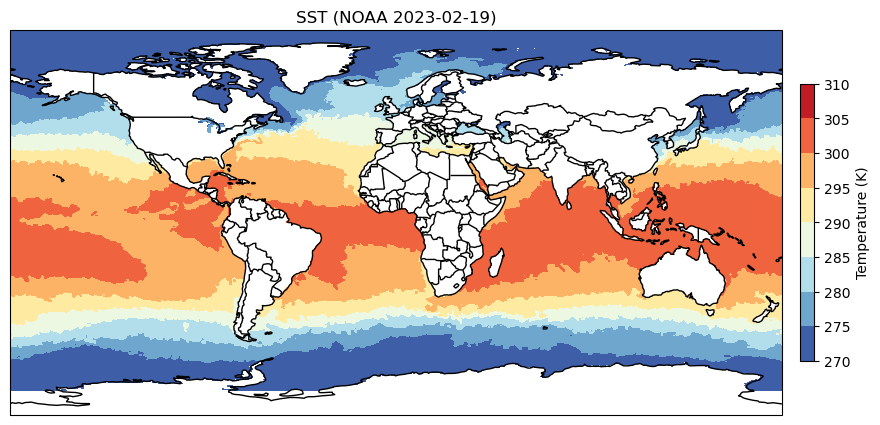

In [29]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.RdYlBu_r

#C to K
sst = ds.sst+273.15

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
c=ax.contourf(ds.lon, ds.lat, sst, cmap=cmap)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('SST (NOAA '+date_str+')')
clb.set_label('Temperature (K)')

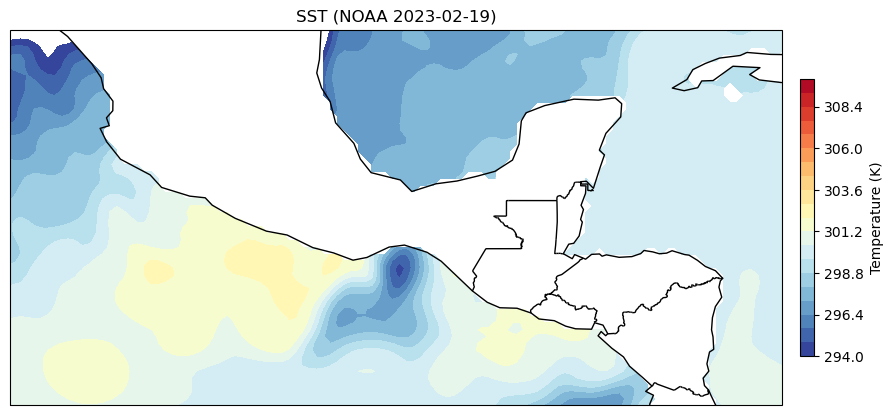

In [30]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.RdYlBu_r
levels = np.linspace(294, 310, 21)

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-109, -81, 24, 10.4], crs=ccrs.PlateCarree())
c=ax.contourf(ds.lon, ds.lat, sst, cmap=cmap, levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('SST (NOAA '+date_str+')')
clb.set_label('Temperature (K)')